# Grocery Habit

My grocery habit in the last 6 months. I mainly shop at three places: Publix, a local Asian market, and Walmart. Publix is for the quality weekly grocery staples, the local Asian market is for my asian cravings, and Walmart is for when i need to bulk up on cleaning supplies or non food items. The non food items at Publix are overpriced. 

## Import packages

In [555]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Load dataset

In [556]:
# Sneak peak of the table
df = pd.read_csv(r'C:path\Grocery Habit.csv')
df.head(2)

,Date,Month,Store,Money Spent
0,6/10/2022,6,Publix,120.58
1,6/26/2022,6,Publix,69.33


In [557]:
# Summary of the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         22 non-null     object 
 1   Month        22 non-null     int64  
 2   Store        22 non-null     object 
 3   Money Spent  22 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 832.0+ bytes


<AxesSubplot: >

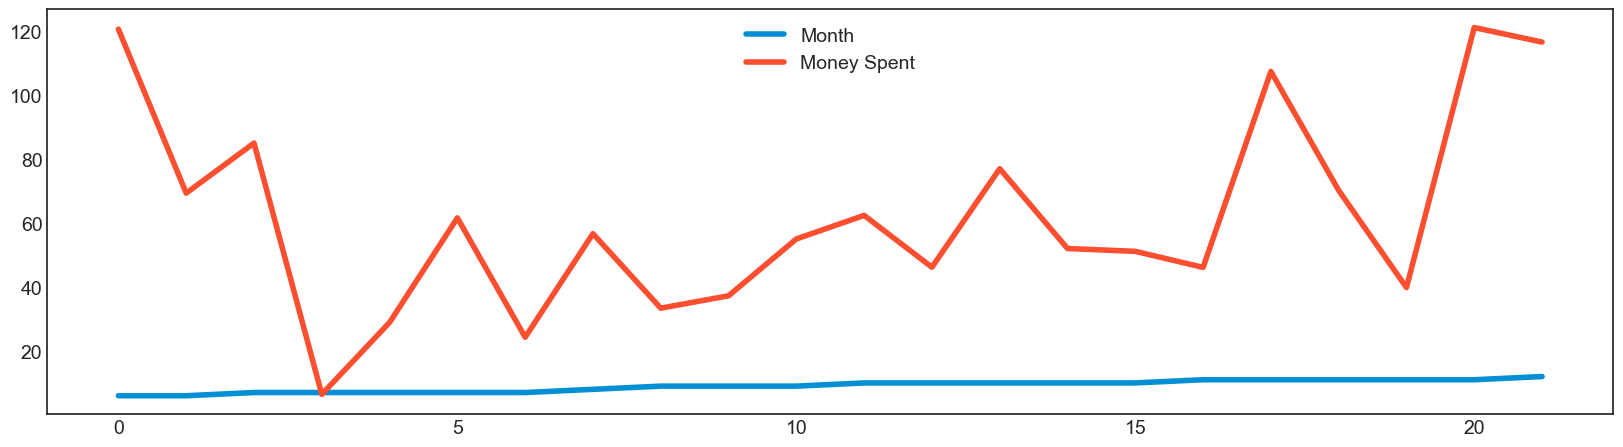

In [558]:
# Big picture - identifying pattern
df.plot(figsize = (18,5))

In [559]:
# Checking for null values
df.isnull().values.any()

False

array([[<AxesSubplot: title={'center': 'Month'}>,
        <AxesSubplot: title={'center': 'Money Spent'}>]], dtype=object)

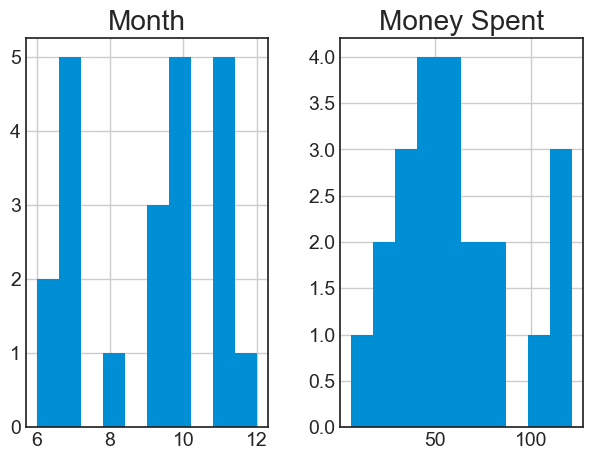

In [560]:
# Distribution of data
df.hist()

## Clean/modify data

In [561]:
# Converting the date object mm/dd/yyyy to another date object mm-dd-yyyy
df["Date"] = pd.to_datetime(df["Date"]).dt.date
print(df.dtypes,'\n')

# Previewing the table - just checking the Date columns is properly converted
print(df.head(2))

Date            object
Month            int64
Store           object
Money Spent    float64
dtype: object 

         Date  Month   Store  Money Spent
0  2022-06-10      6  Publix       120.58
1  2022-06-26      6  Publix        69.33


## Past 6 months

### High level

In [562]:
# Extremes
Cheap = df['Money Spent'].min()
Expensive = df['Money Spent'].max()

print(f'Most cheap trip:\n $',Cheap,'\n')
print(f'Most expensive trip:\n $',Expensive,'\n')


Most cheap trip:
 $ 6.43 

Most expensive trip:
 $ 121.09 



In [563]:
# Basic stats by store
print('The amount of money I spend at each of the main stores:')
Store_group = df.groupby(['Store']).agg({'Money Spent': ['min', 'max', 'mean', 'median']}).round(2)
Store_group.columns = ['min', 'max', 'mean', 'median']
Store_group.reset_index()
Store_group

The amount of money I spend at each of the main stores:


,min,max,mean,median
Store,,,,
Local Asian Market,46.12,70.19,53.62,49.10
Publix,6.43,120.58,60.74,56.66
Walmart,121.09,121.09,121.09,121.09


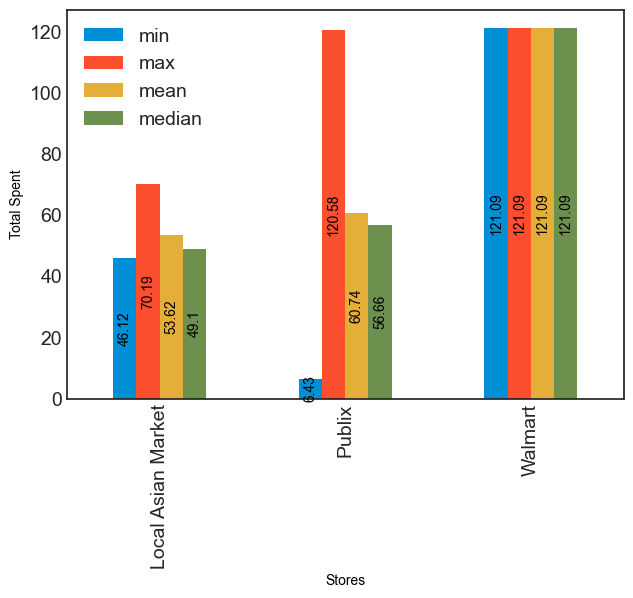

In [564]:
# Stats grouped by store
matplotlib.style.use('seaborn-v0_8-white') 
ax = Store_group.plot.bar()
for container in ax.containers:
    ax.bar_label(container, label_type = 'center', rotation = 'vertical', color = 'black', fontsize = 10)

plt.xlabel('Stores', size = 10, color = 'black')
plt.ylabel('Total Spent', size = 10, color = 'black')


plt.show()

In [565]:
# Count of trips by store in the last 6 months
Trip_count = df['Store'].value_counts()
print(Trip_count)

Publix                17
Local Asian Market     4
Walmart                1
Name: Store, dtype: int64


<AxesSubplot: ylabel='Store'>

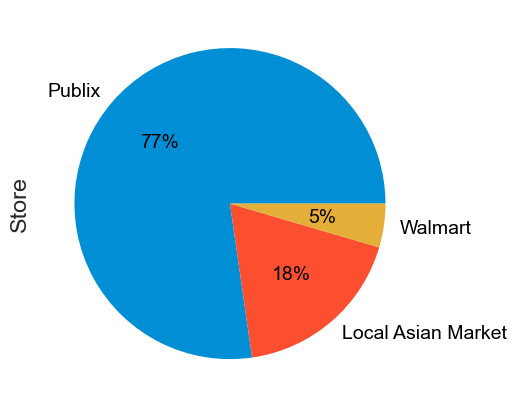

In [566]:
Trip_count.plot(kind = 'pie', y = 'Store', autopct = '%1.0f%%', textprops = {'color':'black'})

### Total

#### Monthly

In [567]:
# Spending per month
Monthly_split = df.groupby('Month')['Money Spent'].sum()
Monthly_split

Month
6     189.91
7     206.20
8      56.66
9     125.61
10    288.66
11    384.59
12    116.54
Name: Money Spent, dtype: float64

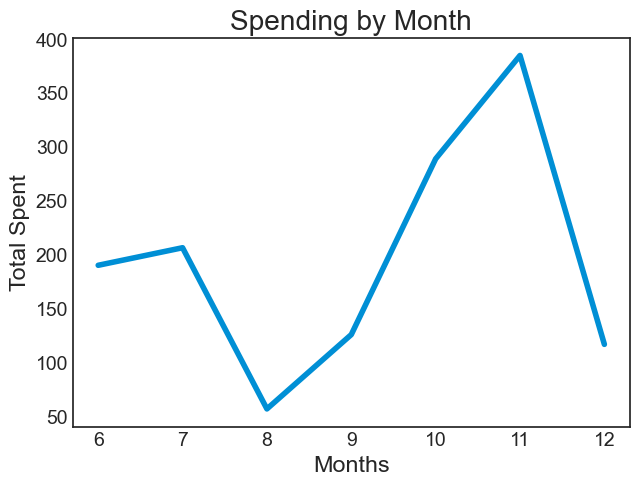

In [568]:
Monthly_split.plot(kind = 'line')

plt.title('Spending by Month')
plt.xlabel('Months')
plt.ylabel('Total Spent')

plt.show()

#### Store

In [569]:
# Spending by store
Store_split = df.groupby('Store')['Money Spent'].sum()
Store_split

Store
Local Asian Market     214.50
Publix                1032.58
Walmart                121.09
Name: Money Spent, dtype: float64

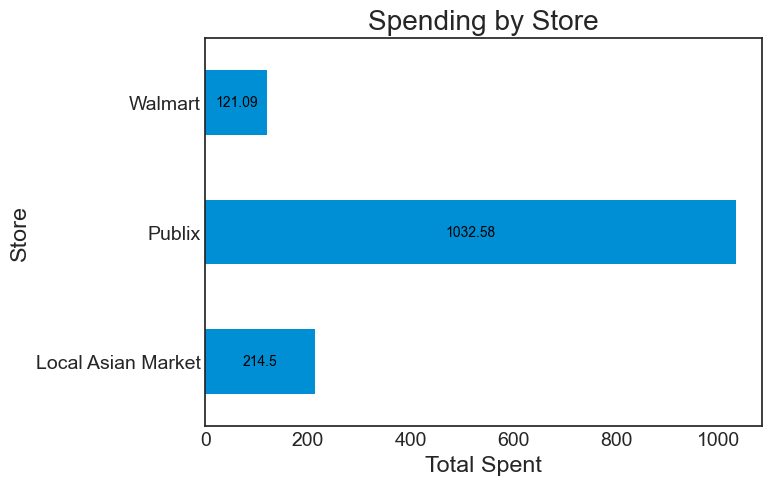

In [570]:
#Store_split.plot(kind='barh')

ax = Store_split.plot.barh()
for container in ax.containers:
    ax.bar_label(container, label_type = 'center', color = 'black', fontsize = 10)

plt.title('Spending by Store')
plt.xlabel('Total Spent')
plt.ylabel('Store')

plt.show()

## Future

### Linear Reg

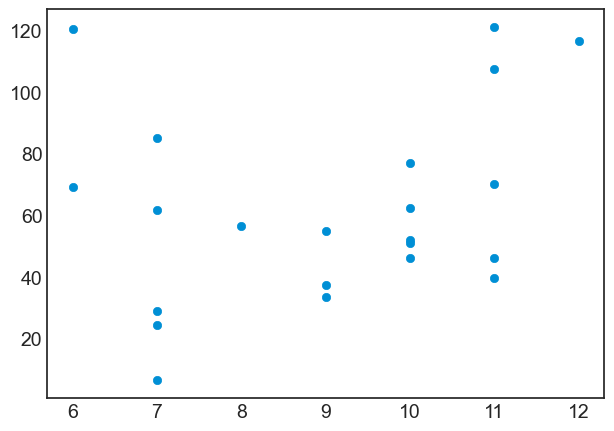

In [571]:
# Validate linear relations
# month x price

plt.scatter(df['Month'], df['Money Spent'])

In [572]:
# Fit data to model
X = pd.DataFrame(df['Month'])
y = pd.DataFrame(df['Money Spent'])

model = LinearRegression()
scores = [ ]
kfold = KFold(n_splits = 3, shuffle = True, random_state = 42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)

print(scores)

[-1.23927810004457, 0.01891650992170768, -0.041110886594505125]


Quick note: 

The LinearRegression() fucntion creates a linear regression model where the for loop sections the dataset into three folds (by shuffling its indices). Inside the loop the data is fit and assesd for its performance by appending the scores to a list. Scikit-learn returns the R² score which is simply the coefficient of determination.

The perfect model is where the score is 1, the baseline is 0, and the worst models are those that are negative.

Given my dataset is quite small I didn't expect a perfect model. There's not enough data to forecast into the future my spending habits.